<a href="https://colab.research.google.com/github/varun19424/Diabetes_Prediction/blob/main/Diabetes_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Importing Datasets**

In [6]:
df = pd.read_csv("diabetes.csv")


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.shape

(768, 9)

In [13]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

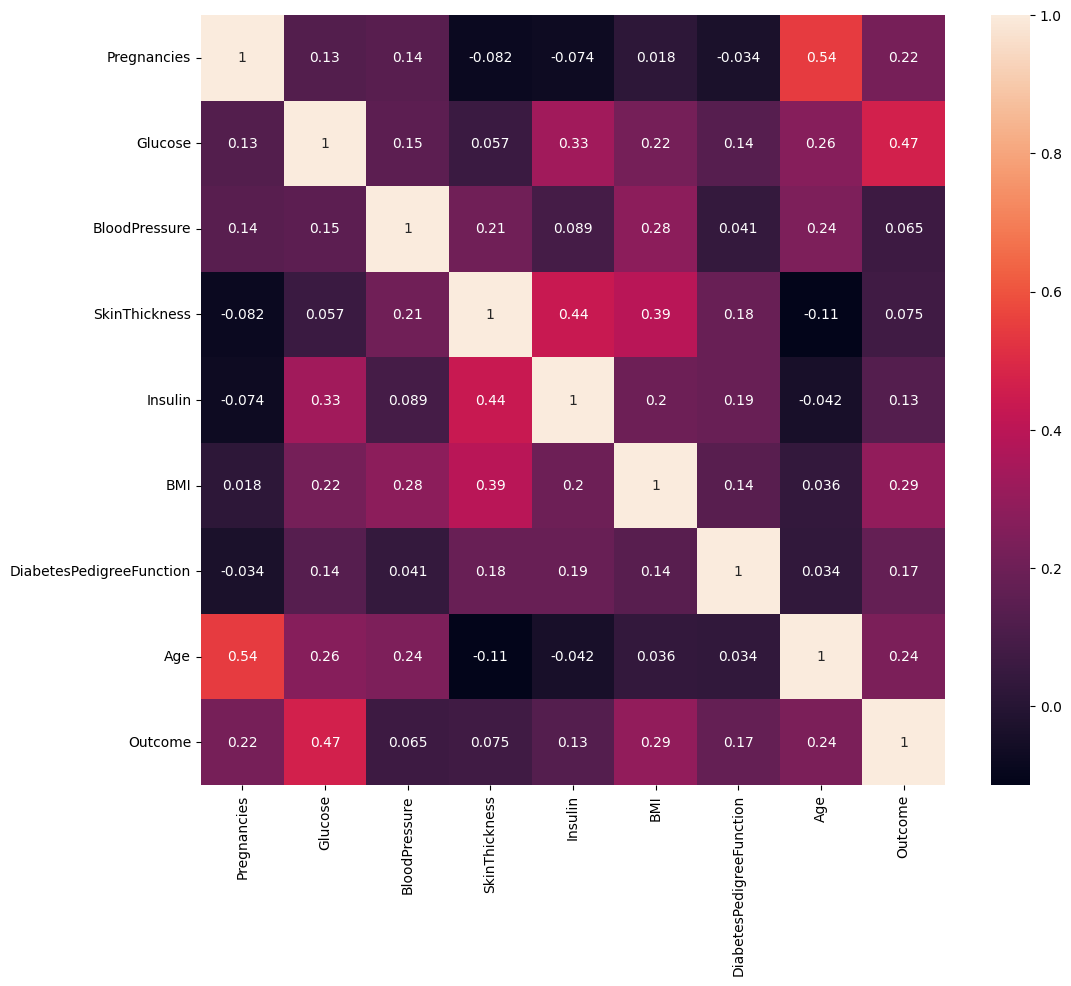

In [21]:
plt.figure(figsize = (12, 10))

sns.heatmap(df.corr(), annot=True)

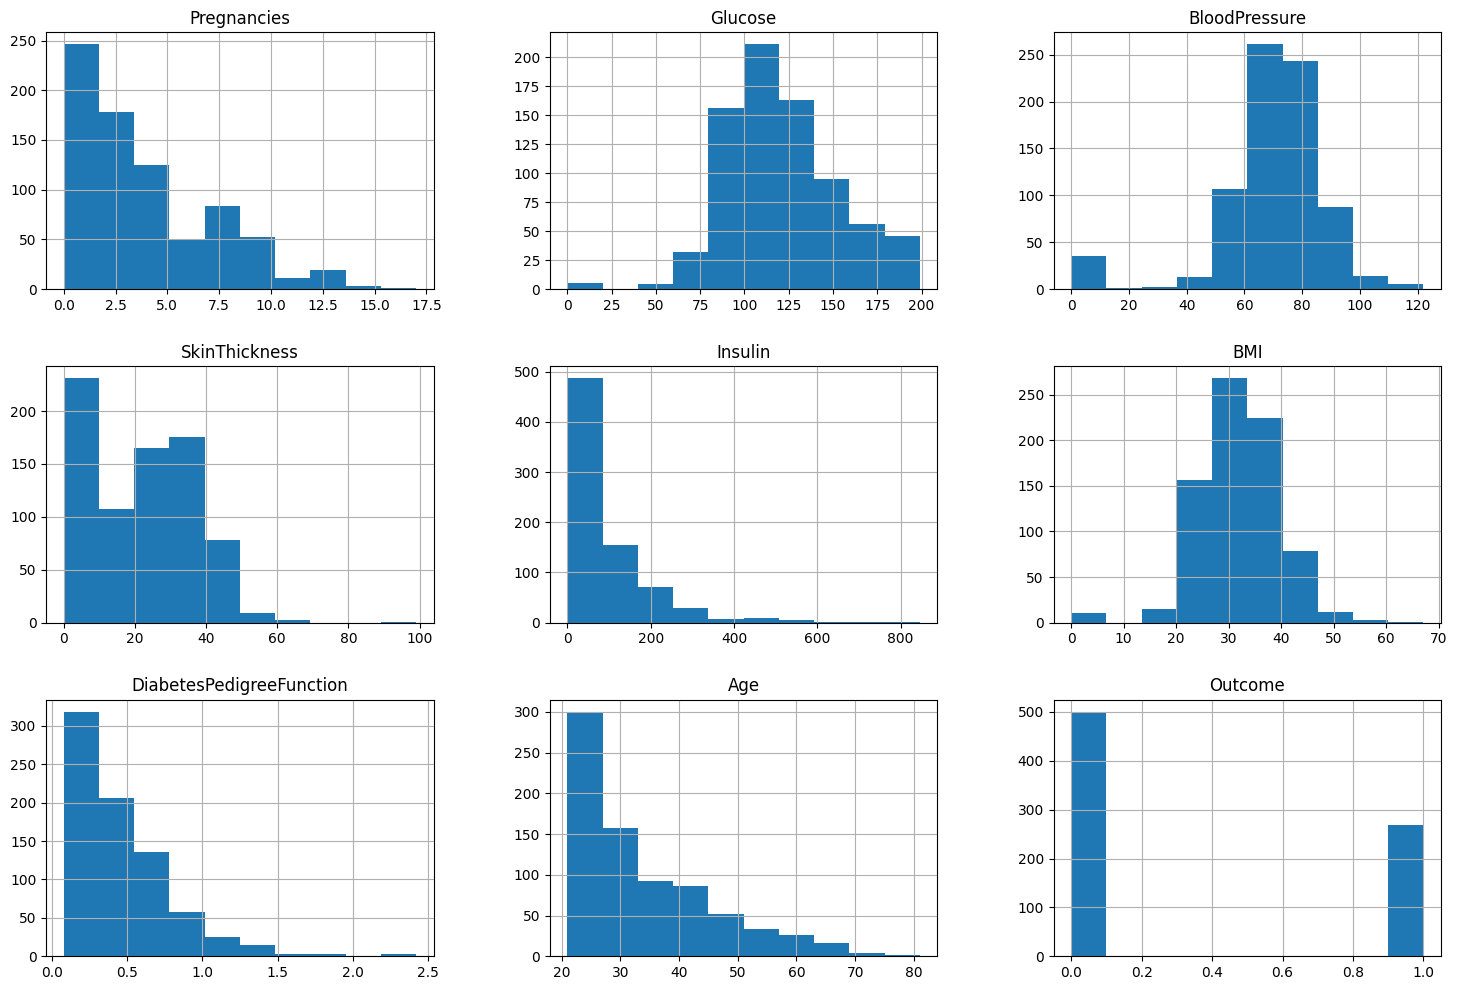

In [22]:
df.hist(figsize=(18,12))
plt.show()

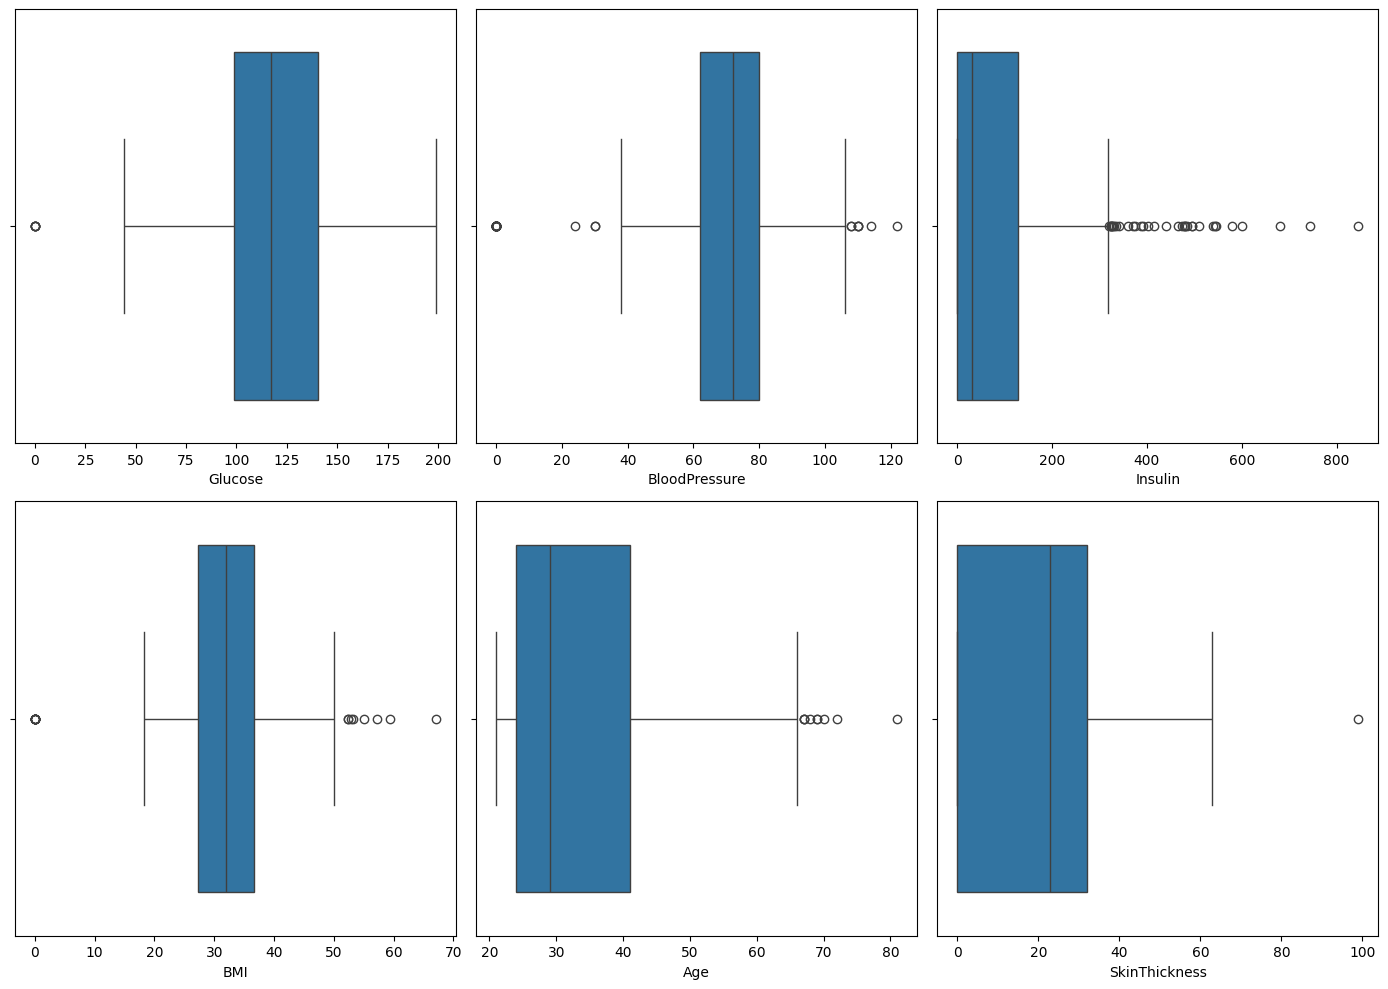

In [23]:
features = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'SkinThickness']
plt.figure(figsize=(14,10))

for i, feature in enumerate(features, start=1):
  plt.subplot(2, 3, i)
  sns.boxplot(x=feature, data=df)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

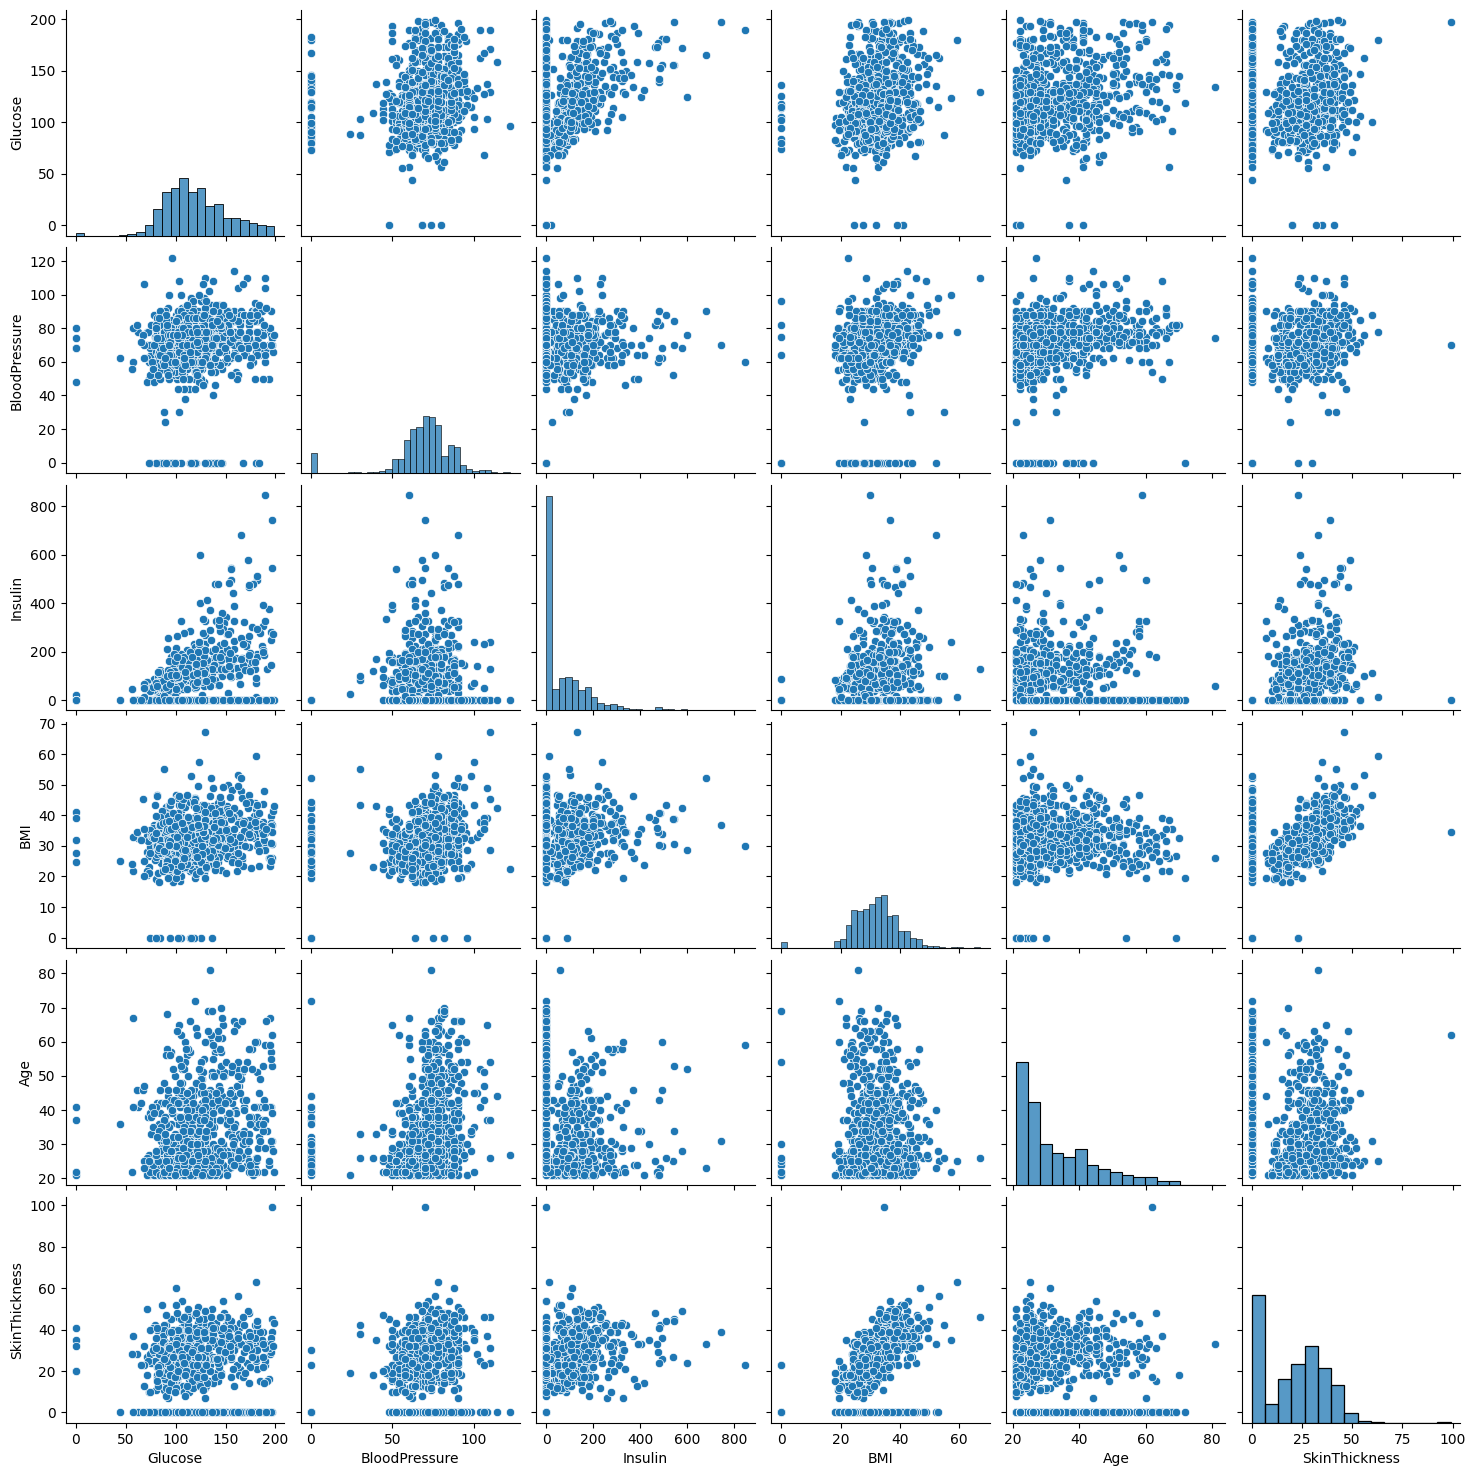

In [25]:
mean_col = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'SkinThickness']

sns.pairplot(df[mean_col], palette='dark')

<Axes: xlabel='Outcome', ylabel='Insulin'>

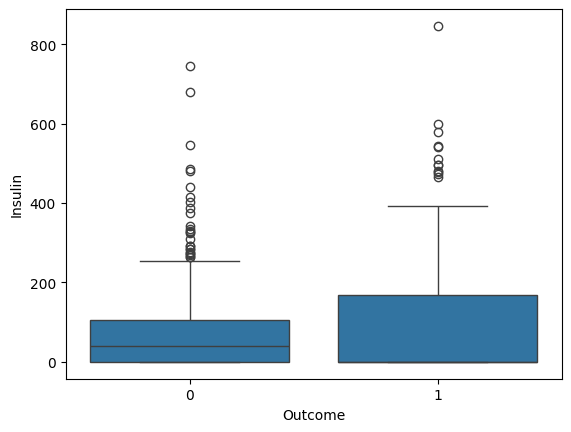

In [26]:
sns.boxplot(x='Outcome',y='Insulin', data=df)

<Axes: xlabel='BMI', ylabel='Glucose'>

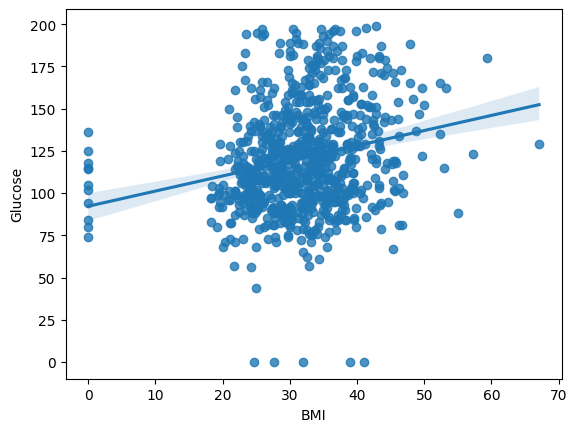

In [27]:
sns.regplot(x='BMI', y='Glucose', data=df)

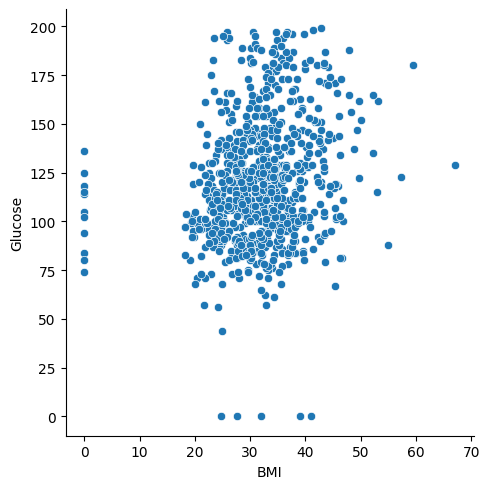

In [28]:
sns.relplot(x='BMI', y='Glucose', data=df)

<Axes: xlabel='Glucose', ylabel='Insulin'>

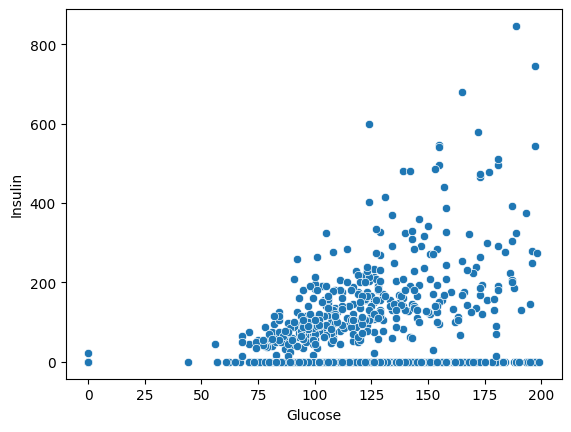

In [30]:
sns.scatterplot(x='Glucose',y='Insulin',data=df)

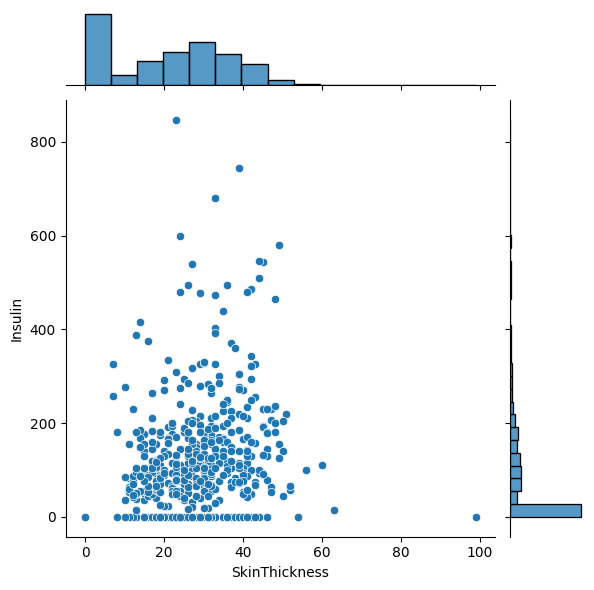

In [31]:
sns.jointplot(x='SkinThickness', y='Insulin', data=df)

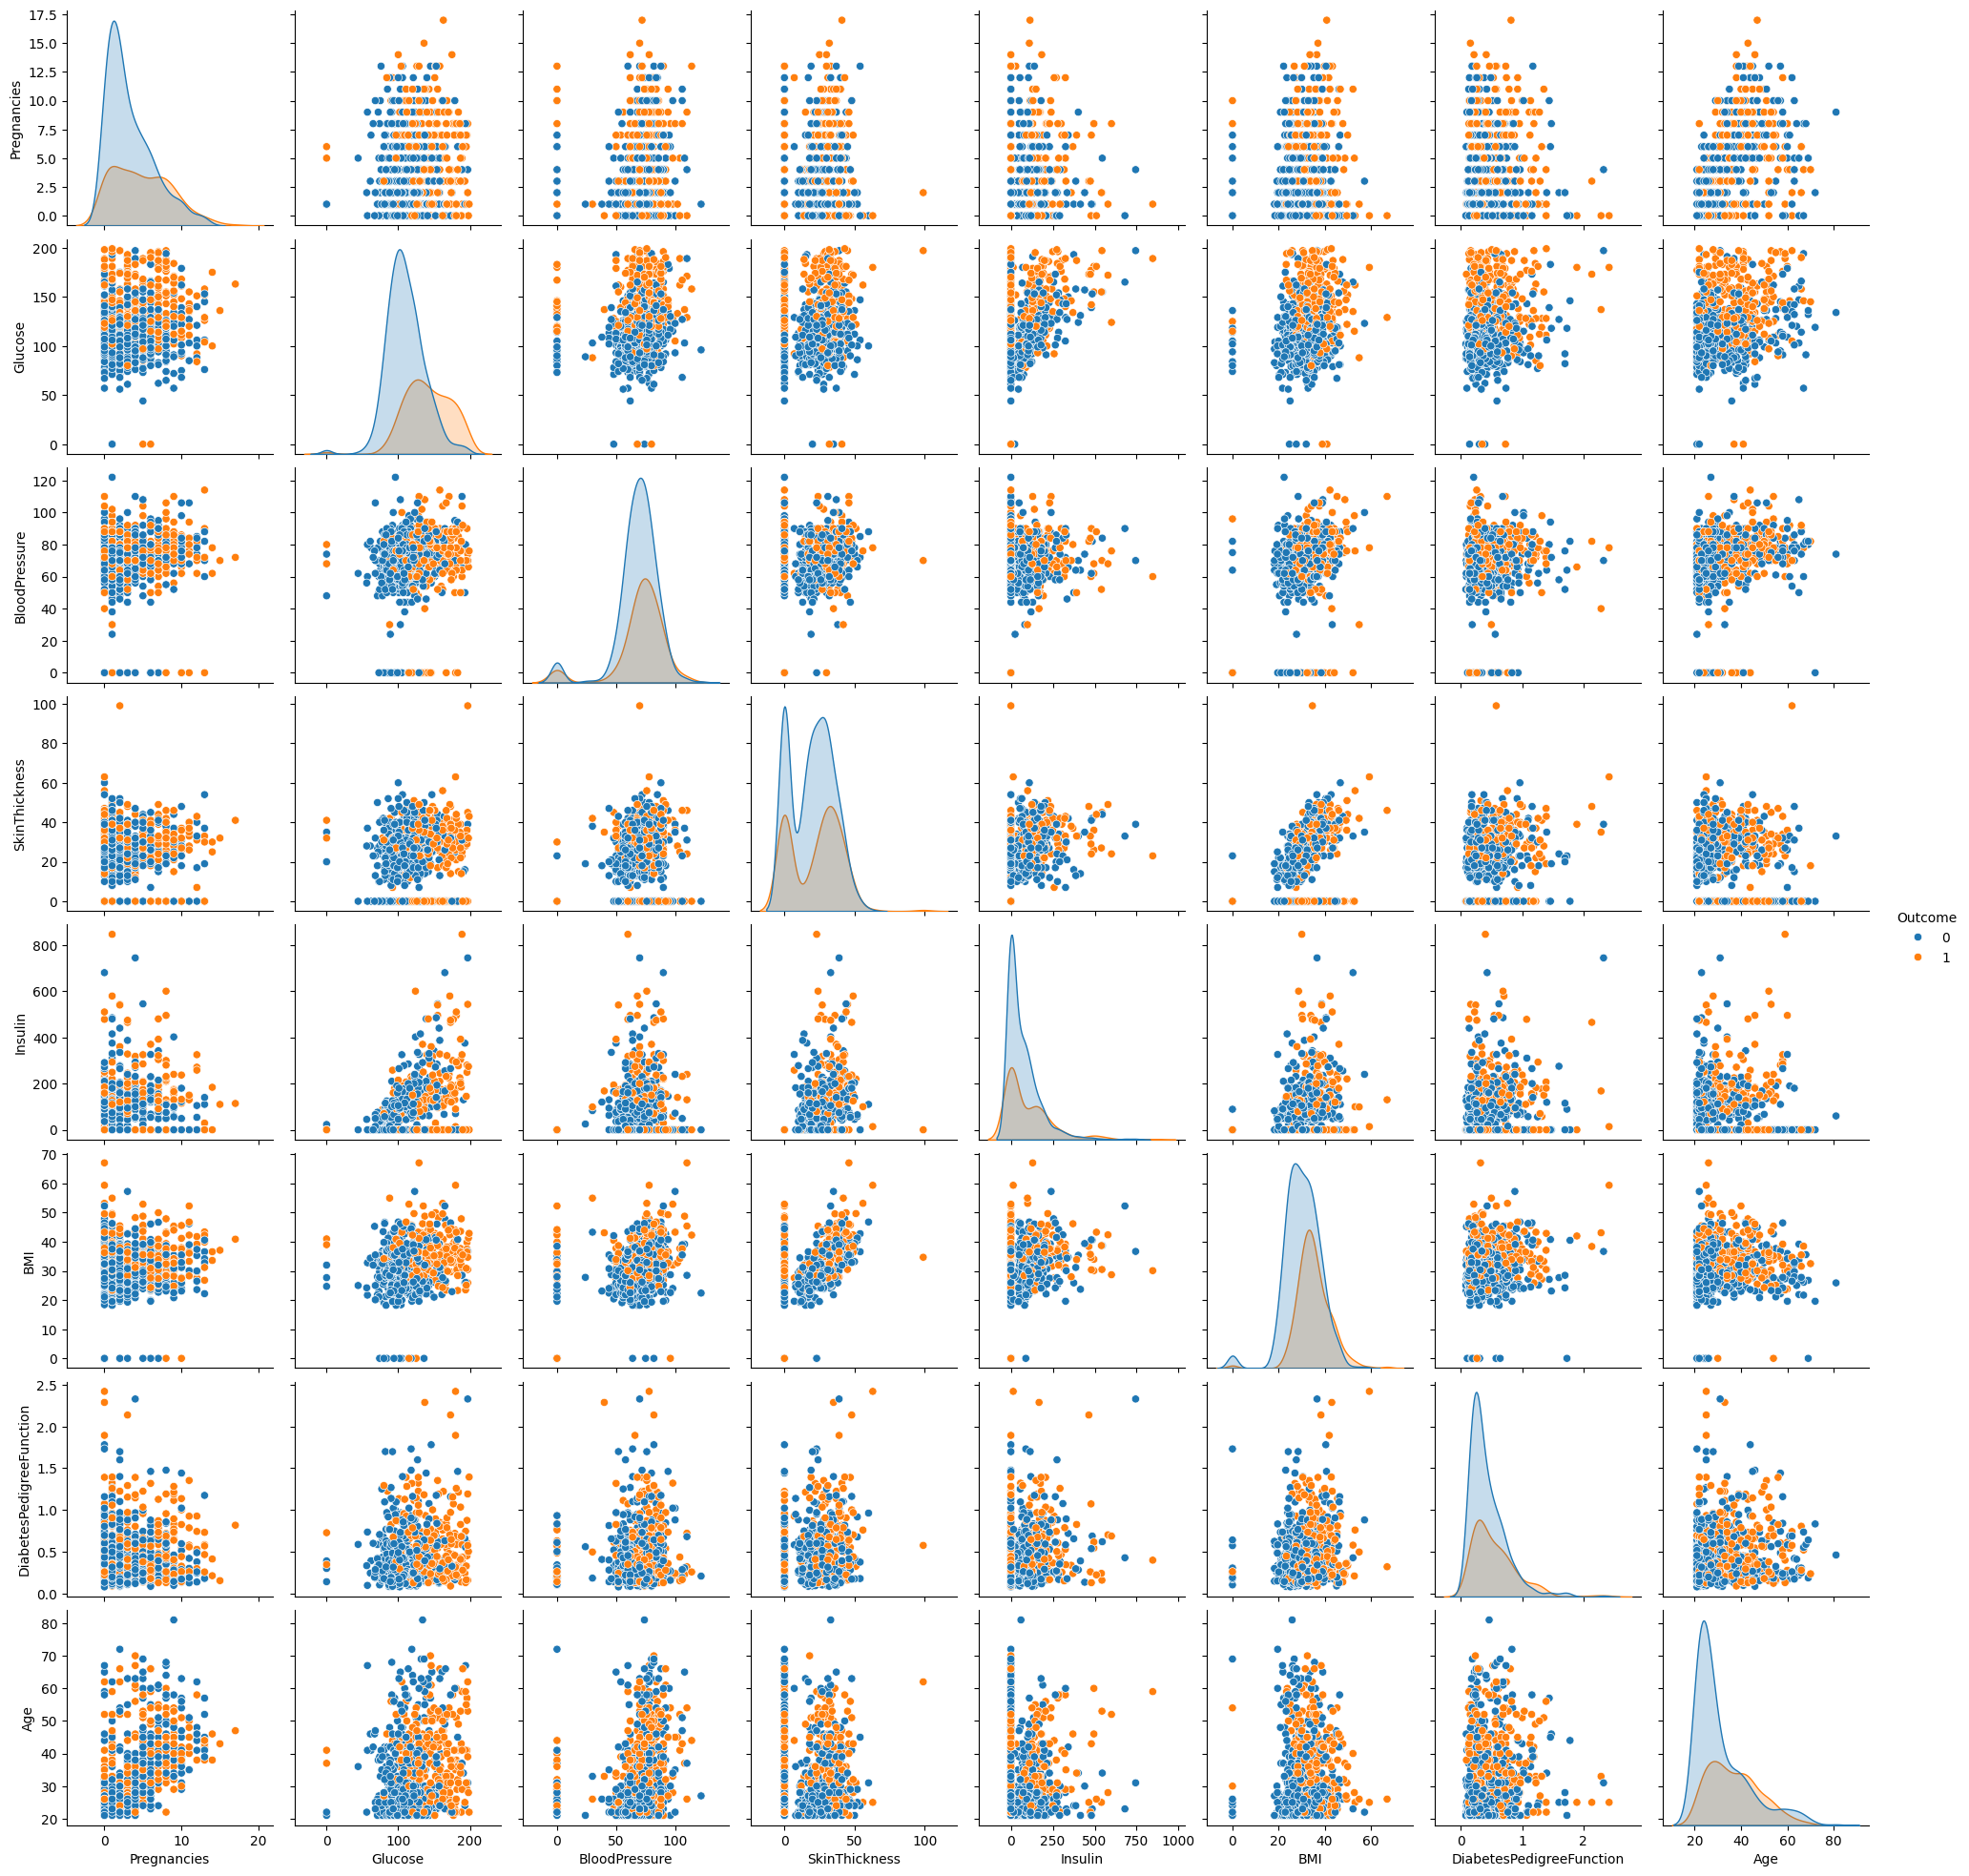

In [32]:
sns.pairplot(df, hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

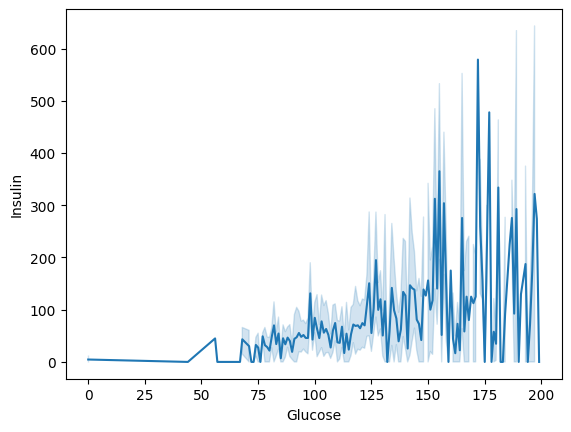

In [33]:
sns.lineplot(x='Glucose', y='Insulin', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.7% of the points cannot be plac

<Axes: xlabel='Glucose', ylabel='Insulin'>

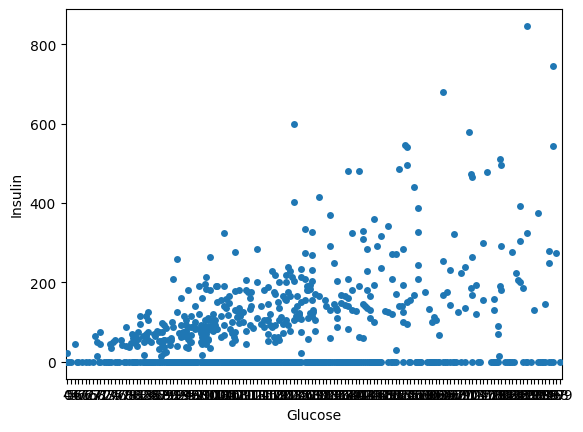

In [34]:
sns.swarmplot(x='Glucose', y='Insulin', data=df)

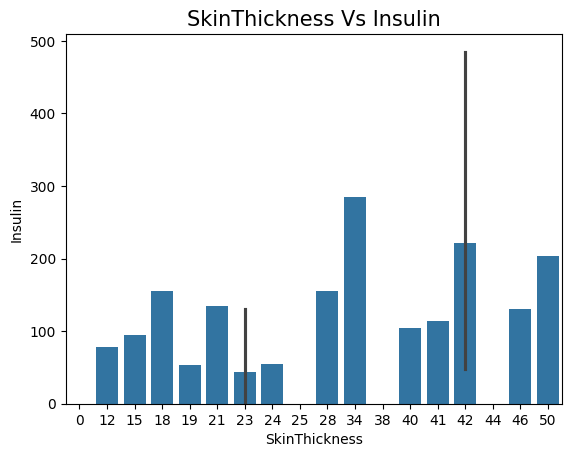

In [35]:
sns.barplot(x='SkinThickness', y='Insulin', data=df[150:180])
plt.title('SkinThickness Vs Insulin',fontsize=15)
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.show()
plt.style.use('ggplot')

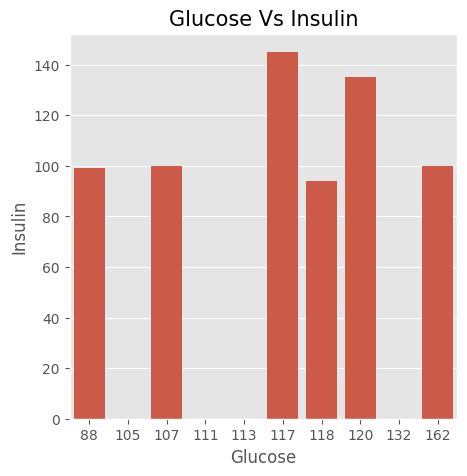

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x='Glucose', y='Insulin', data=df[120:130])
plt.title('Glucose Vs Insulin',fontsize=15)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

**Training and Testing Data**

In [71]:
X = df.drop(columns = 'Outcome')

y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# **Models**



1.   **Logistic Regression**



In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred, y_test)
print("Logistic Regression Accuracy is: {:.2f}%".format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

[[98  9]
 [18 29]]
Logistic Regression Accuracy is: 82.47%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




2.   **K Neighbors**



In [75]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_pred, y_test))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred, y_test)
print('KNeighborsClassifier accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154

[[90 20]
 [17 27]]
KNeighborsClassifier accuracy is: 75.97%


3. **SVC**

In [76]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred, y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

[[98  9]
 [23 24]]
SVC accuracy is: 79.22%


4. **Random Forest**

In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

from sklearn.metrics import accuracy_score
RFCAcc = accuracy_score(y_pred, y_test)
print("RFC accuracy is: {:.2f}%".format(RFCAcc*100))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       112
           1       0.66      0.74      0.70        42

    accuracy                           0.82       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.83      0.82      0.83       154

[[96 16]
 [11 31]]
RFC accuracy is: 82.47%


5. **Gradient Boosting**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

from sklearn.metrics import accuracy_score
GBCAcc = accuracy_score(y_pred, y_test)
print("GBC accuracy is: {:.2f}%".format(GBCAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154

[[92 15]
 [15 32]]
GBC accuracy is: 80.52%


6. **Naive Bayes**

In [83]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

from sklearn.metrics import accuracy_score
NVAcc = accuracy_score(y_pred, y_test)
print("NV accuracy is: {:.2f}%".format(NVAcc*100))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       111
           1       0.62      0.67      0.64        43

    accuracy                           0.79       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.80      0.79      0.79       154

[[93 18]
 [14 29]]
NV accuracy is: 79.22%


**Compare Models**

In [91]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Random Forest', 'GradientBoostingClassifier', 'GaussianNB'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, RFCAcc*100, GBCAcc*100, NVAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.467532
3,Random Forest,82.467532
4,GradientBoostingClassifier,80.519481
2,SVM,79.220779
5,GaussianNB,79.220779
1,K Neighbors,75.974026


**Compare Plots**

<Axes: xlabel='Model'>

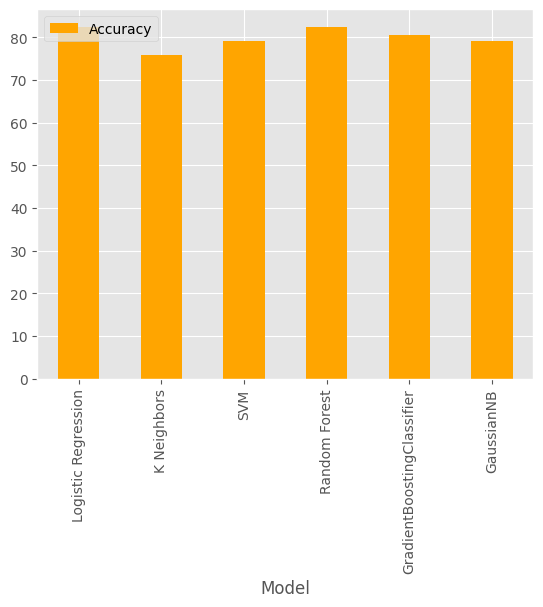

In [92]:
compare.plot(x='Model', y='Accuracy', kind='bar', color='orange')

**From the comprasion plot, among the 6 ML Models, Logistic Regression and Random Forest had achieve the heighest accuracy of 82.47%**